# Gradient boosting using XGBoost library

This tutorial contains:

- Learning a classification tree using gradient boosting
- Cross validation to tune learning parameter 

## Example data set

Let's use diabetes from Skilearn: breast cancer diagnosis based on tumor properties from images.

In [1]:
# data set
from sklearn import datasets
# numpy
import numpy as np
# data frames
import pandas as pd

In [2]:
ds = datasets.load_breast_cancer(as_frame=True)

In [3]:
print(ds.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
ds.frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
ds.frame['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [6]:
ds.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
ds.frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [8]:
X, y = ds.frame.iloc[:,:-1], ds.frame.iloc[:,-1]
# X = ds.data
# y = ds.target

### Train-test split

Make an 80%-20% split

In [9]:
# Split function
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6734)

## Gradient boosting decision tree

Construct the classifier and train using train data.

In [11]:
# XGBoost
import xgboost as xgb

Classifier definition

In [12]:
xgb_classifier = xgb.XGBClassifier(n_estimators=10, 
                                   objective='binary:logistic', 
                                   booster='gbtree', # reiterating that we use gradient boosting 
                                   use_label_encoder=False,
                                   max_depth=5, 
                                   learning_rate=0.1)

train the `xgb_classifier` instance

In [13]:
xgb_classifier.fit(X_train, y_train, eval_metric='logloss')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

## Classifier performance: ROC

For the ROC we compare the actual observations with the prediction using the test data. 

In [14]:
from sklearn.metrics import roc_auc_score

In [15]:
# No skill classifier for comparisson
ns_pred = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_pred)
# Actual classifier
y_pred = xgb_classifier.predict(X_test)
cl_auc = roc_auc_score(y_test, y_pred)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Classifier: ROC AUC=%.3f' % (cl_auc))

No Skill: ROC AUC=0.500
Classifier: ROC AUC=0.969


## Tuning learning parameters using cross validation

To tune parameters in the classifier, for exmaple: `learning_rate`, we use cross validation.

In [16]:
# from scipy import stats
from sklearn.model_selection import GridSearchCV, KFold

First, we construct the classifier without specifying tuning parameters and define trunning paramaters in a dictionary

In [17]:
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', 
                                   booster='gbtree',
                                   use_label_encoder=False)
params = {'n_estimators': [10, 50, 100],
          'learning_rate': [0.01, 0.05, 0.1]}

Then, we use use for loops to run fit the classifier using for all possible parameter values and each cross validation fold. This is provided by the function `GridSearchCV`.

In the verbose results we have 3 `n_estimators` times 3 `learning_rate` times 4 folds equals = 36 fits.

In [18]:
n_folds = 4
cv_classifier = GridSearchCV(xgb_classifier, 
                             param_grid=params, 
                             scoring='roc_auc', # 'f1' is another choice
                             cv=n_folds,
                             verbose=3)
cv_classifier.fit(X_train, y_train, eval_metric='logloss')

Fitting 4 folds for each of 9 candidates, totalling 36 fits
[CV] learning_rate=0.01, n_estimators=10 .............................
[CV] . learning_rate=0.01, n_estimators=10, score=0.970, total=   0.0s
[CV] learning_rate=0.01, n_estimators=10 .............................
[CV] . learning_rate=0.01, n_estimators=10, score=0.965, total=   0.0s
[CV] learning_rate=0.01, n_estimators=10 .............................
[CV] . learning_rate=0.01, n_estimators=10, score=0.969, total=   0.0s
[CV] learning_rate=0.01, n_estimators=10 .............................
[CV] . learning_rate=0.01, n_estimators=10, score=0.986, total=   0.0s
[CV] learning_rate=0.01, n_estimators=50 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] . learning_rate=0.01, n_estimators=50, score=0.969, total=   0.3s
[CV] learning_rate=0.01, n_estimators=50 .............................
[CV] . learning_rate=0.01, n_estimators=50, score=0.976, total=   0.0s
[CV] learning_rate=0.01, n_estimators=50 .............................
[CV] . learning_rate=0.01, n_estimators=50, score=0.975, total=   0.1s
[CV] learning_rate=0.01, n_estimators=50 .............................
[CV] . learning_rate=0.01, n_estimators=50, score=0.996, total=   0.2s
[CV] learning_rate=0.01, n_estimators=100 ............................
[CV]  learning_rate=0.01, n_estimators=100, score=0.987, total=   0.1s
[CV] learning_rate=0.01, n_estimators=100 ............................
[CV]  learning_rate=0.01, n_estimators=100, score=0.978, total=   0.1s
[CV] learning_rate=0.01, n_estimators=100 ............................
[CV]  learning_rate=0.01, n_estimators=100, score=0.981, total=   0.1s
[CV] learning_rate=0.01, n_estimators=100 ............................
[CV]  

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    3.0s finished


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=N

The best parameters

In [19]:
cv_classifier.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

provides the best estimator

In [20]:
classifier = cv_classifier.best_estimator_
classifier

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

with score

In [21]:
cv_classifier.best_score_

0.9904816495874471

In [22]:
y_pred = classifier.predict(X_test)
cl_auc = roc_auc_score(y_test, y_pred)
print('Classifier: ROC AUC=%.3f' % (cl_auc))

Classifier: ROC AUC=0.963


Alternatively, we can randomize the search of the best parameters instead of looping through a set of values. The advantage is that we provide a large range of parameter values. This is provided by `RandomizedSearchCV` using distributions in the `stats` library.

In [23]:
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV, KFold

In [24]:
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', 
                                   booster='gbtree',
                                   use_label_encoder=False)
params = {'n_estimators': stats.randint(100, 500),
              'learning_rate': stats.uniform(0.01, 0.1),
              'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]}
n_folds = 4
cv_classifier = RandomizedSearchCV(xgb_classifier, 
                             param_distributions=params, 
                             cv=n_folds,
                             n_iter = 40, #should be larger or equal to using grid search
                             scoring = 'roc_auc',
                             verbose=3) #use 1 to turn off verbose
cv_classifier.fit(X_train, y_train, eval_metric='logloss')
classifier=cv_classifier.best_estimator_
print('Best parameters:', cv_classifier.best_params_)
print('Score:', cv_classifier.best_score_)

Fitting 4 folds for each of 40 candidates, totalling 160 fits
[CV] learning_rate=0.06368375284328284, max_depth=5, n_estimators=145 
[CV]  learning_rate=0.06368375284328284, max_depth=5, n_estimators=145, score=0.996, total=   0.1s
[CV] learning_rate=0.06368375284328284, max_depth=5, n_estimators=145 
[CV]  learning_rate=0.06368375284328284, max_depth=5, n_estimators=145, score=0.985, total=   0.1s
[CV] learning_rate=0.06368375284328284, max_depth=5, n_estimators=145 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  learning_rate=0.06368375284328284, max_depth=5, n_estimators=145, score=0.986, total=   0.1s
[CV] learning_rate=0.06368375284328284, max_depth=5, n_estimators=145 
[CV]  learning_rate=0.06368375284328284, max_depth=5, n_estimators=145, score=0.997, total=   0.1s
[CV] learning_rate=0.04881875307846992, max_depth=11, n_estimators=201 
[CV]  learning_rate=0.04881875307846992, max_depth=11, n_estimators=201, score=0.996, total=   0.1s
[CV] learning_rate=0.04881875307846992, max_depth=11, n_estimators=201 
[CV]  learning_rate=0.04881875307846992, max_depth=11, n_estimators=201, score=0.985, total=   0.2s
[CV] learning_rate=0.04881875307846992, max_depth=11, n_estimators=201 
[CV]  learning_rate=0.04881875307846992, max_depth=11, n_estimators=201, score=0.985, total=   0.1s
[CV] learning_rate=0.04881875307846992, max_depth=11, n_estimators=201 
[CV]  learning_rate=0.04881875307846992, max_depth=11, n_estimators=201, score=0.997, total=   0.2s
[CV] learning_rate=0.0259567059708598, max_

[CV]  learning_rate=0.06025524113648594, max_depth=8, n_estimators=365, score=0.995, total=   0.2s
[CV] learning_rate=0.06025524113648594, max_depth=8, n_estimators=365 
[CV]  learning_rate=0.06025524113648594, max_depth=8, n_estimators=365, score=0.982, total=   0.4s
[CV] learning_rate=0.06025524113648594, max_depth=8, n_estimators=365 
[CV]  learning_rate=0.06025524113648594, max_depth=8, n_estimators=365, score=0.986, total=   0.3s
[CV] learning_rate=0.06025524113648594, max_depth=8, n_estimators=365 
[CV]  learning_rate=0.06025524113648594, max_depth=8, n_estimators=365, score=0.997, total=   0.2s
[CV] learning_rate=0.10755673484879061, max_depth=13, n_estimators=424 
[CV]  learning_rate=0.10755673484879061, max_depth=13, n_estimators=424, score=0.996, total=   0.1s
[CV] learning_rate=0.10755673484879061, max_depth=13, n_estimators=424 
[CV]  learning_rate=0.10755673484879061, max_depth=13, n_estimators=424, score=0.980, total=   0.1s
[CV] learning_rate=0.10755673484879061, max_dep

[CV]  learning_rate=0.06702881635822715, max_depth=11, n_estimators=247, score=0.995, total=   0.3s
[CV] learning_rate=0.06702881635822715, max_depth=11, n_estimators=247 
[CV]  learning_rate=0.06702881635822715, max_depth=11, n_estimators=247, score=0.982, total=   0.1s
[CV] learning_rate=0.06702881635822715, max_depth=11, n_estimators=247 
[CV]  learning_rate=0.06702881635822715, max_depth=11, n_estimators=247, score=0.987, total=   0.4s
[CV] learning_rate=0.06702881635822715, max_depth=11, n_estimators=247 
[CV]  learning_rate=0.06702881635822715, max_depth=11, n_estimators=247, score=0.997, total=   0.1s
[CV] learning_rate=0.06944729996419044, max_depth=10, n_estimators=146 
[CV]  learning_rate=0.06944729996419044, max_depth=10, n_estimators=146, score=0.996, total=   0.1s
[CV] learning_rate=0.06944729996419044, max_depth=10, n_estimators=146 
[CV]  learning_rate=0.06944729996419044, max_depth=10, n_estimators=146, score=0.985, total=   0.1s
[CV] learning_rate=0.06944729996419044, 

[CV]  learning_rate=0.08412975899552615, max_depth=7, n_estimators=469, score=0.981, total=   0.5s
[CV] learning_rate=0.08412975899552615, max_depth=7, n_estimators=469 
[CV]  learning_rate=0.08412975899552615, max_depth=7, n_estimators=469, score=0.988, total=   0.4s
[CV] learning_rate=0.08412975899552615, max_depth=7, n_estimators=469 
[CV]  learning_rate=0.08412975899552615, max_depth=7, n_estimators=469, score=0.996, total=   0.1s
[CV] learning_rate=0.10780881217040524, max_depth=8, n_estimators=174 
[CV]  learning_rate=0.10780881217040524, max_depth=8, n_estimators=174, score=0.996, total=   0.1s
[CV] learning_rate=0.10780881217040524, max_depth=8, n_estimators=174 
[CV]  learning_rate=0.10780881217040524, max_depth=8, n_estimators=174, score=0.982, total=   0.1s
[CV] learning_rate=0.10780881217040524, max_depth=8, n_estimators=174 
[CV]  learning_rate=0.10780881217040524, max_depth=8, n_estimators=174, score=0.987, total=   0.1s
[CV] learning_rate=0.10780881217040524, max_depth=8

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:   33.4s finished


Best parameters: {'learning_rate': 0.08842400921050683, 'max_depth': 3, 'n_estimators': 397}
Score: 0.9913063653237253


The about 400 estimators and 0.08 learning rate seems to work well for this data.

In [26]:
y_pred = classifier.predict(X_test)
cl_auc = roc_auc_score(y_test, y_pred)
print('Classifier: ROC AUC=%.3f' % (cl_auc))

Classifier: ROC AUC=0.957


## Plotting

In [27]:
# Plotting
import matplotlib.pyplot as plt
%matplotlib inline

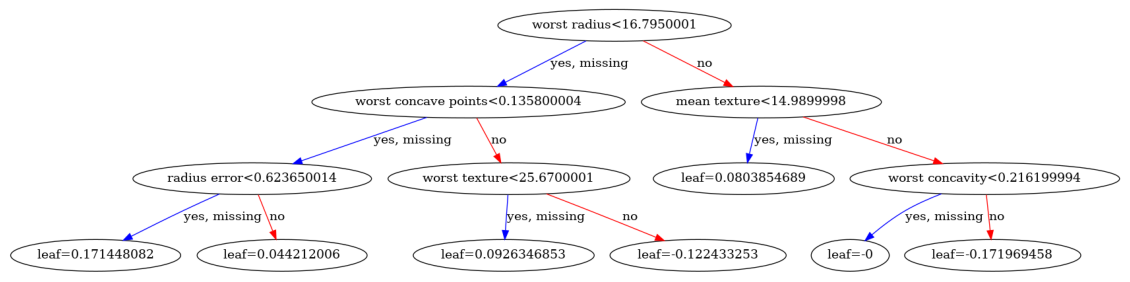

In [28]:
xgb.plot_tree(classifier, num_trees=0, fontsize=10)
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.show()

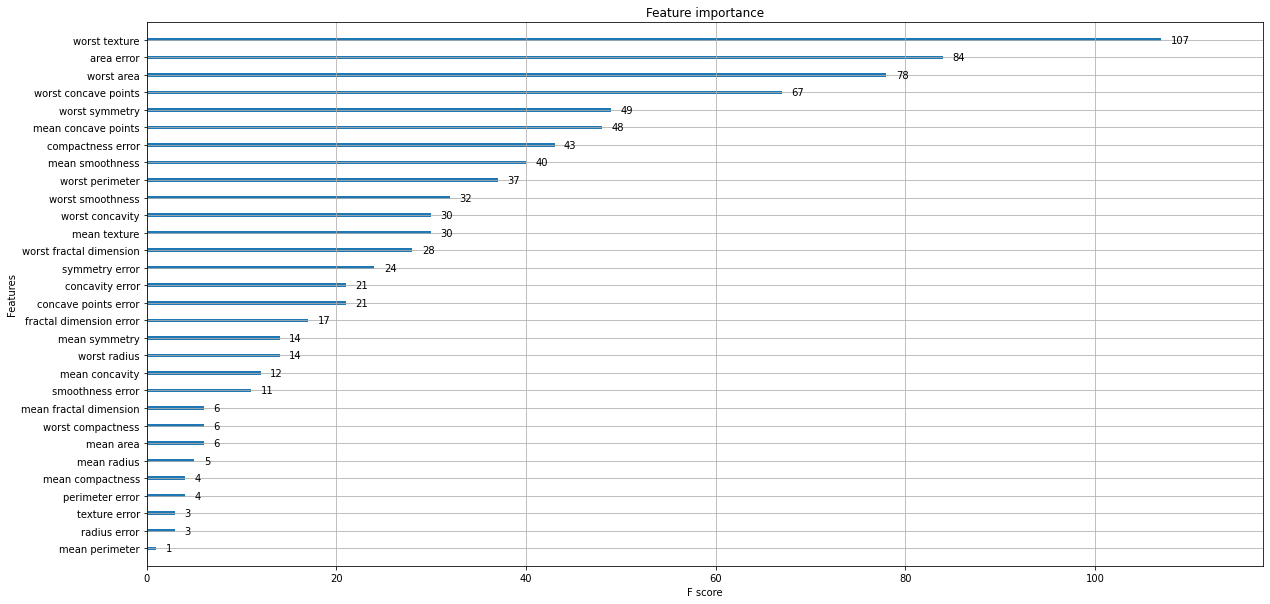

In [29]:
xgb.plot_importance(classifier)
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.show()

In [30]:
from sklearn.metrics import roc_curve

In [31]:
# No skill classifier for comparisson
ns_pred = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_pred)
# Actual classifier
y_pred = classifier.predict(X_test)
cl_auc = roc_auc_score(y_test, y_pred)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Classifier: ROC AUC=%.3f' % (cl_auc))

No Skill: ROC AUC=0.500
Classifier: ROC AUC=0.957


Plot the roc curve for the model

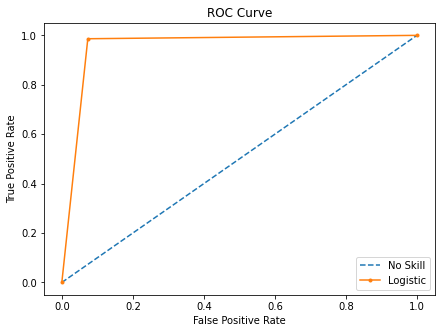

In [32]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_pred)
cl_fpr, cl_tpr, _ = roc_curve(y_test, y_pred)
plt.rcParams['figure.figsize'] = [7, 5]
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(cl_fpr, cl_tpr, marker='.', label='Logistic')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()